In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from modeling.cnn import CNNModel
from trainer.train import train_model
from dataloader.data_loader import get_dataloaders

In [2]:
import sys
sys.path.append("..")  # Add the parent directory to the Python path
sys.path.append("/Users/mia/landslide_susceptibility_model")  # Replace with the actual path

In [3]:
# Paths to the data directories
image_dir = "/Users/mia/landslide_susceptibility_model/data/tiles/images"
label_dir = "/Users/mia/landslide_susceptibility_model/data/tiles/labels"

# Get data loaders for the full dataset
train_loader, val_loader, test_loader = get_dataloaders(
    image_dir=image_dir, 
    label_dir=label_dir, 
    batch_size=16  # Adjust batch size based on your memory capacity
)

In [6]:
# Check device availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Initialize the CNN model
model = CNNModel(input_channels=4)  # Adjust input_channels if needed

# Define the loss function and optimizer
criterion = nn.BCELoss(weight=torch.tensor([50000]).to(device))  # Binary cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

Using device: cpu


In [7]:
# Train the model
run1 = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=5,  # Adjust based on how long you want to train
    validate_every=5,  # Validate every 2 epochs
    device=device,
    checkpoint_dir="model_runs/checkpoints/cnn_run"  # Save checkpoints for the full run
)

Epoch [1/5], Training Loss: 17713.8519
Epoch [2/5], Training Loss: 483.6933
Epoch [3/5], Training Loss: 459.3644
Epoch [4/5], Training Loss: 475.5717
Epoch [5/5], Training Loss: 474.4165
Epoch [5/5], Validation Loss: 600.6926


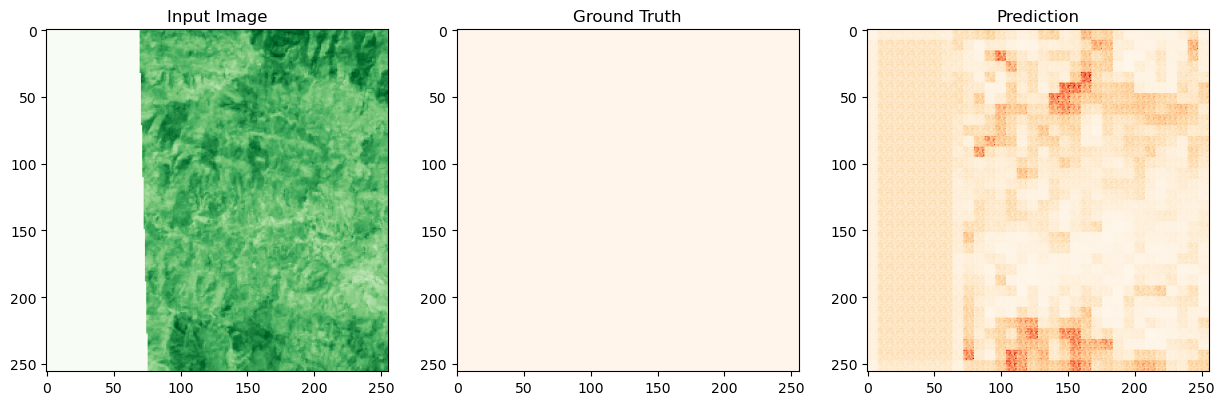

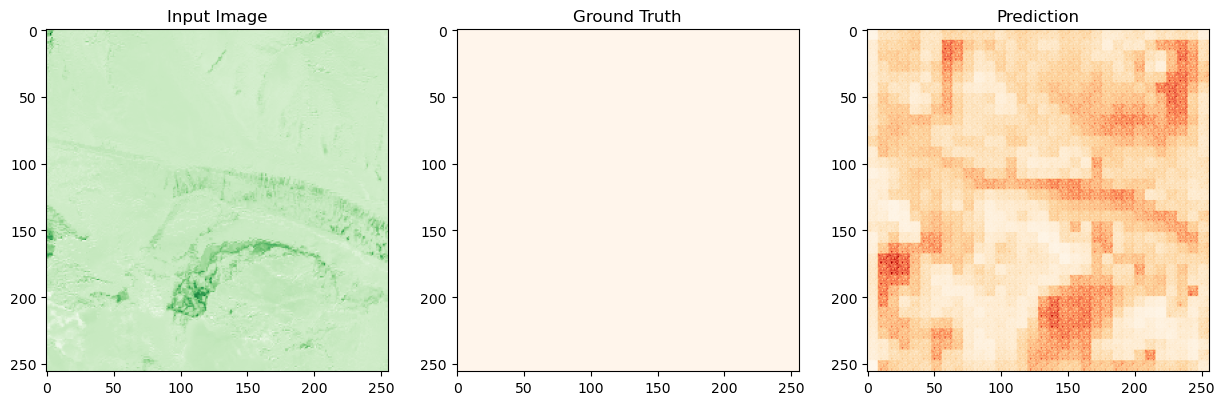

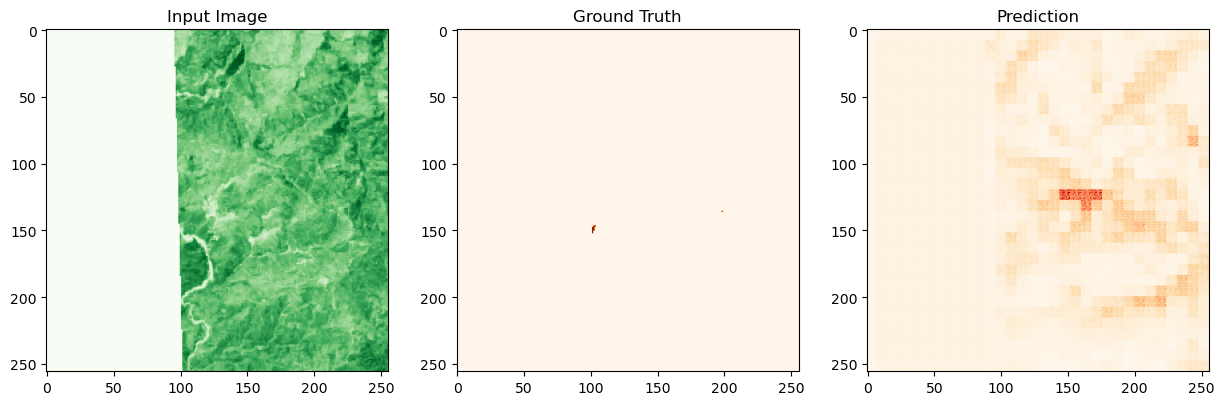

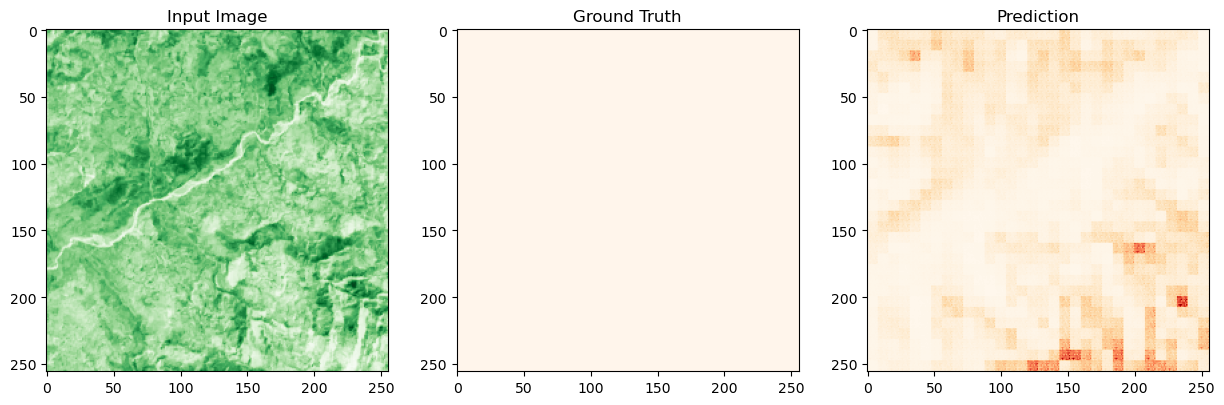

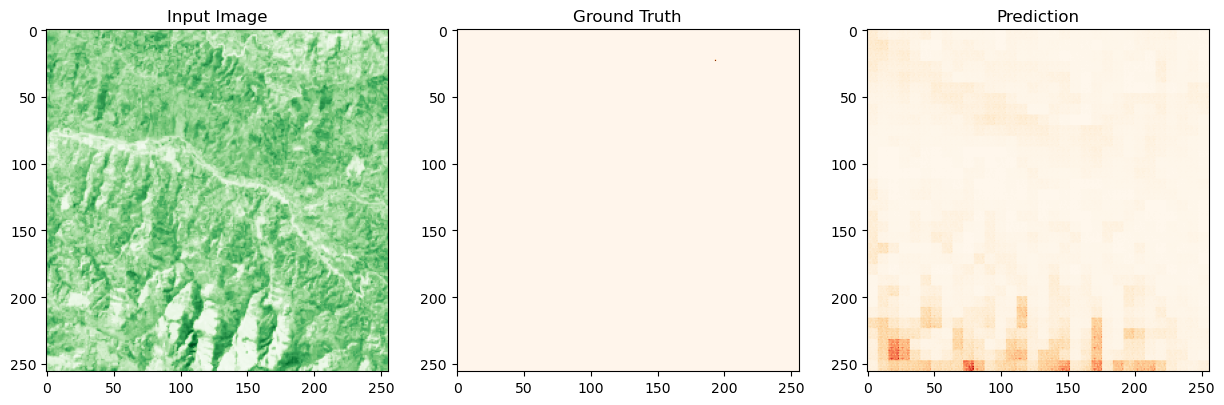

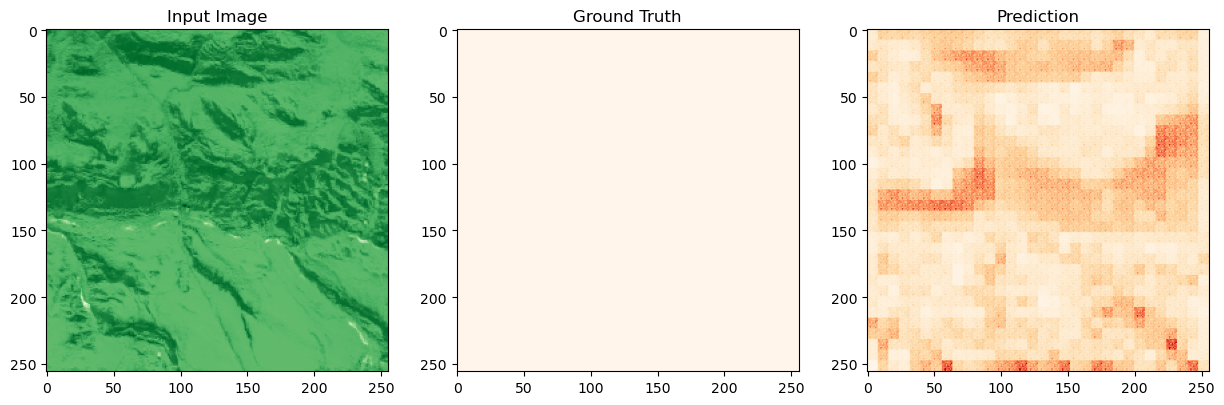

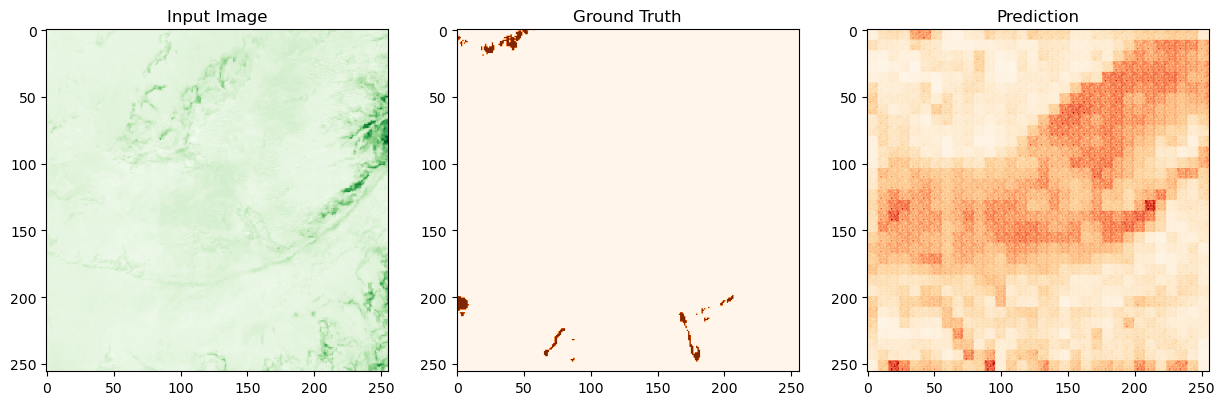

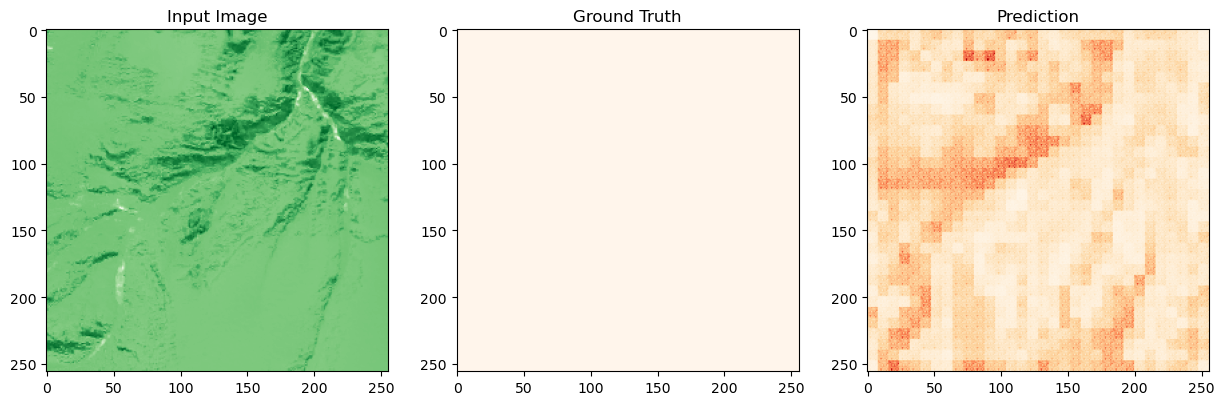

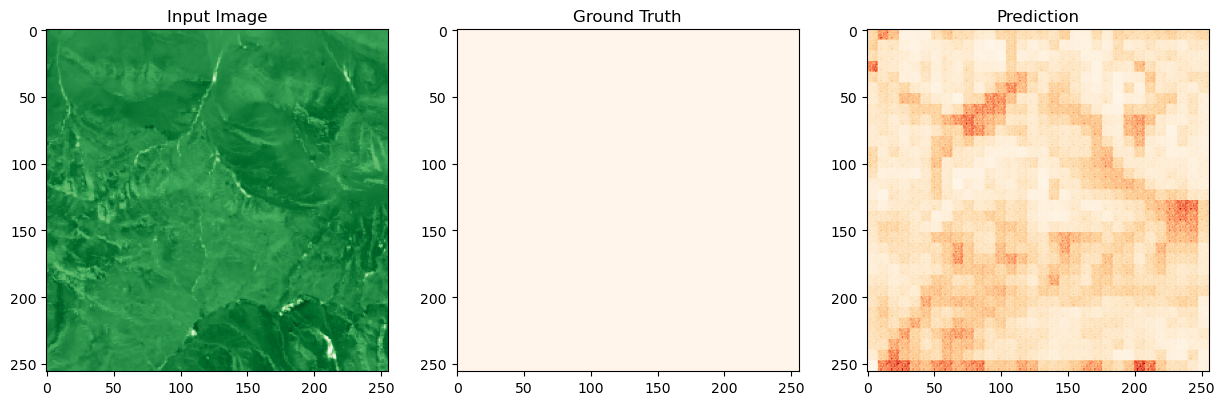

In [11]:
import matplotlib.pyplot as plt

# Example: Visualize a single image, ground truth, and prediction
for images, labels in val_loader:
    with torch.no_grad():
        predictions = model(images.to(device)).cpu().numpy()

    # Visualize first sample
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Input Image")
    plt.imshow(images[0, 0], cmap="Greens")
    plt.subplot(1, 3, 2)
    plt.title("Ground Truth")
    plt.imshow(labels[0, 0], cmap="Oranges")
    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.imshow(predictions[0, 0], cmap="OrRd")
    plt.show()
